In [10]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
import numpy as np
import torch
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
import matplotlib.pyplot as plt


def sample_data():
    count = 10000
    rand = np.random.RandomState(0)
    a = 0.3 + 0.1 * rand.randn(count)
    b = 0.8 + 0.05 * rand.randn(count)
    mask = rand.rand(count) < 0.5
    samples = np.clip(a * mask + b * (1 - mask), 0.0, 1.0)
    return np.digitize(samples, np.linspace(0.0, 1.0, 100))
data = sample_data()
data = torch.from_numpy(data)

In [11]:
train_len = int(len(data) * 0.8)
sub_train_, sub_valid_ = \
    random_split(data, [train_len, len(data) - train_len])

trainloader = torch.utils.data.DataLoader(sub_train_, batch_size=1024)


In [12]:
def myloss(thetas , batch_data):
    theta_divided_sum = torch.exp(thetas)/torch.sum(torch.exp(thetas))
    probVector = theta_divided_sum[batch_data]
    loss = torch.mean(-torch.log2(probVector)-1)
    return loss
    

In [13]:
thetas = torch.zeros(100,requires_grad=True)

In [14]:
import torch.optim as optim

#criterion = nn.NLLLoss()
optimizer = optim.SGD([thetas], lr=0.1) #, momentum=0.9)

for epoch in range(1000):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, batch_data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = batch_data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        #outputs = model1(batch_data.float())
        loss = myloss(thetas, batch_data)
        loss.backward()
        optimizer.step()
        
        if(epoch % 100) == 0:
            print(loss.item())

print('Finished Training')

5.643858909606934
5.641460418701172
5.638937473297119
5.6362481117248535
5.63421106338501
5.631516456604004
5.628588676452637
5.626540184020996
4.978377342224121
4.9793243408203125
4.930108070373535
4.921302318572998
4.988031387329102
4.9611921310424805
4.932417392730713
4.9526872634887695
4.9078826904296875
4.898913860321045
4.845317363739014
4.840906143188477
4.916987895965576
4.884590148925781
4.852907657623291
4.875701427459717
4.88539457321167
4.871156692504883
4.816996097564697
4.815708160400391
4.895589828491211
4.857730388641357
4.826672077178955
4.850305080413818
4.874575614929199
4.857472896575928
4.803837299346924
4.804218292236328
4.886416435241699
4.84450626373291
4.814358234405518
4.838294506072998
4.868156909942627
4.849400520324707
4.796651840209961
4.797916412353516
4.881628513336182
4.836889743804932
4.807437896728516
4.831467151641846
4.86384916305542
4.844119071960449
4.792316913604736
4.794059753417969
4.878788948059082
4.832075119018555
4.803094863891602
4.8271207

Text(0, 0.5, 'Probabilities')

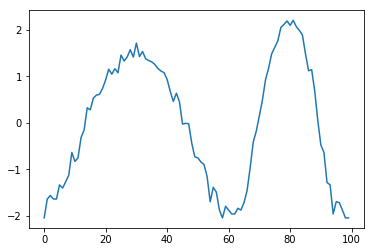

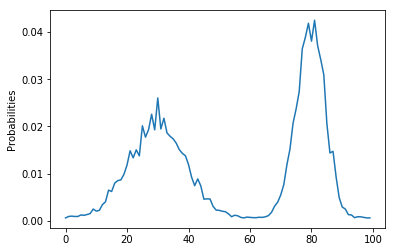

In [15]:
plt.plot(np.arange(0,100),thetas.tolist())
plt.figure()
plt.plot(np.arange(0,100),(torch.exp(thetas)/torch.sum(torch.exp(thetas))).tolist())
plt.ylabel('Probabilities')


# Part 2

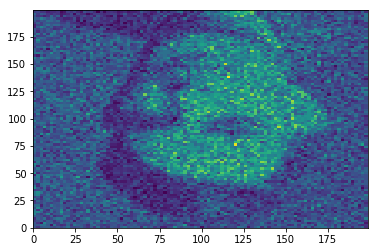

In [16]:
file = np.load('distribution.npy')
pairs=np.indices(dimensions=(200,200)).T # here are all of the x,y pairs 
n = 100000
inds = np.random.choice(np.arange(200**2),p=file.reshape(-1),size=n,replace=True)
data = pairs.reshape(-1,2)[inds]
fig = plt.hist2d(data[:,0],data[:,1],bins=100)

In [17]:

train_len = int(len(data) * 0.8)
sub_train_, sub_valid_ = \
    random_split(data, [train_len, len(data) - train_len])

testdata = sub_valid_.dataset
trainloader = torch.utils.data.DataLoader(sub_train_, batch_size=1024)

Design p_x2 given x1


In [129]:
def part2loss(logits , x2):
    logits_divided_sum = torch.exp(logits)/torch.sum(torch.exp(logits),dim=1).view(logits.shape[0],1)
    probVector = logits_divided_sum[x2>0.5]
    loss = torch.mean(-torch.log2(torch.Tensor(probVector))-1)
    return loss


import torch.optim as optim
import torch.nn as nn

testdata = torch.tensor(sub_valid_.dataset)
testX1 = torch.nn.functional.one_hot(testdata[:,0],num_classes=200).float()
testX2 = torch.nn.functional.one_hot(testdata[:,1],num_classes=200).float()

model = torch.zeros(200,200,requires_grad=True)
optimizer = optim.SGD([model], lr=2.5)

lossTraining = []
lossTesting  = []

for epoch in range(1000):  # loop over the dataset multiple times
    for i, batch_data in enumerate(trainloader):
        optimizer.zero_grad()
        encodedX1 = torch.nn.functional.one_hot(batch_data[:,0],num_classes=200).float()
        encodedX2 = torch.nn.functional.one_hot(batch_data[:,1],num_classes=200).float()
        output = torch.mm(encodedX1,model)
        loss = part2loss(output, encodedX2)
        loss.backward()
        optimizer.step()

    lossTraining.append(loss.item())
    lossTesting.append(part2loss(torch.mm(testX1,model),testX2).item())      
    if(epoch % 20) == 0:
        print("Iter %d, training = %.2f testing = %.2f" %(epoch,lossTraining[-1],lossTesting[-1]))

Iter 0, training = 6.64 testing = 6.64
Iter 20, training = 5.92 testing = 6.56
Iter 40, training = 5.37 testing = 6.50
Iter 60, training = 5.01 testing = 6.46
Iter 80, training = 4.78 testing = 6.43
Iter 100, training = 4.65 testing = 6.42
Iter 120, training = 4.57 testing = 6.40
Iter 140, training = 4.53 testing = 6.39
Iter 160, training = 4.50 testing = 6.39
Iter 180, training = 4.49 testing = 6.38
Iter 200, training = 4.48 testing = 6.38


KeyboardInterrupt: 

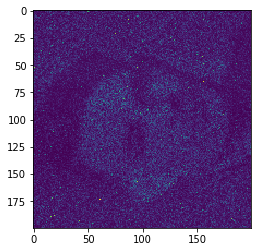

In [130]:
test = torch.eye(200)
plt.imshow(np.array(a))

